In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D, MaxPooling2D, Flatten
from keras.losses import SparseCategoricalCrossentropy
from keras.datasets import fashion_mnist


In [3]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

test_images.shape
train_images.shape

(60000, 28, 28)

In [5]:
class_labels = ['Tshirt','Trousers','Pullover','Frock','Jacket','Heels','Full-Sleeves Tshirt','Shoes','Bag','Ankle Boots']

<function matplotlib.pyplot.show(close=None, block=None)>

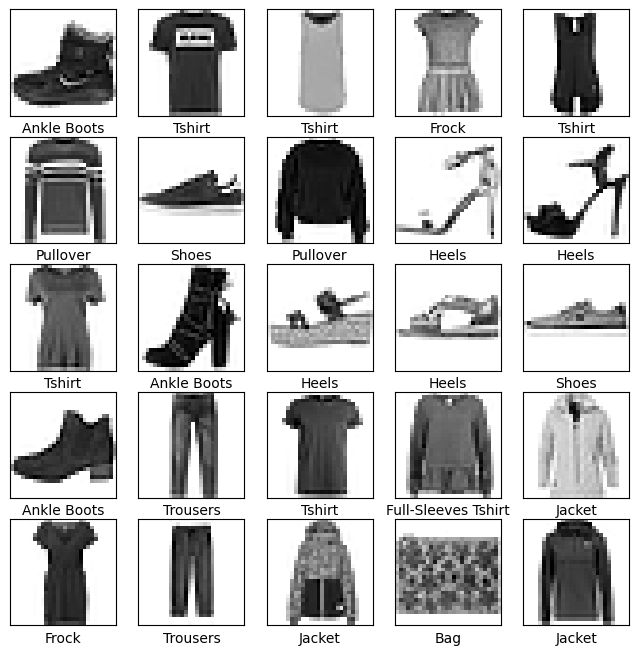

In [6]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary )
    plt.xlabel(class_labels[train_labels[i]])
plt.show

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [8]:
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4055 - accuracy: 0.8579
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2765 - accuracy: 0.8997
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2347 - accuracy: 0.9136
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2077 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1817 - accuracy: 0.9330
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1609 - accuracy: 0.9406
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1407 - accuracy: 0.9485
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1243 - accuracy: 0.9549
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1115 - accuracy: 0.9582
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.097

In [9]:
loss,accuracy = model.evaluate(test_images,test_labels)
print("Loss: ", loss)
print("Accuracy: ", accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.9039
Loss:  0.3420398533344269
Accuracy:  0.9039000272750854


In [10]:
y_pred = model.predict(test_images)
y_pred.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [11]:
def plot_images(i,predictions,true_label,img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions)
    if predicted_label == true_label:
        color='green'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label], 100*np.max(predictions), class_labels[true_label]),color=color)


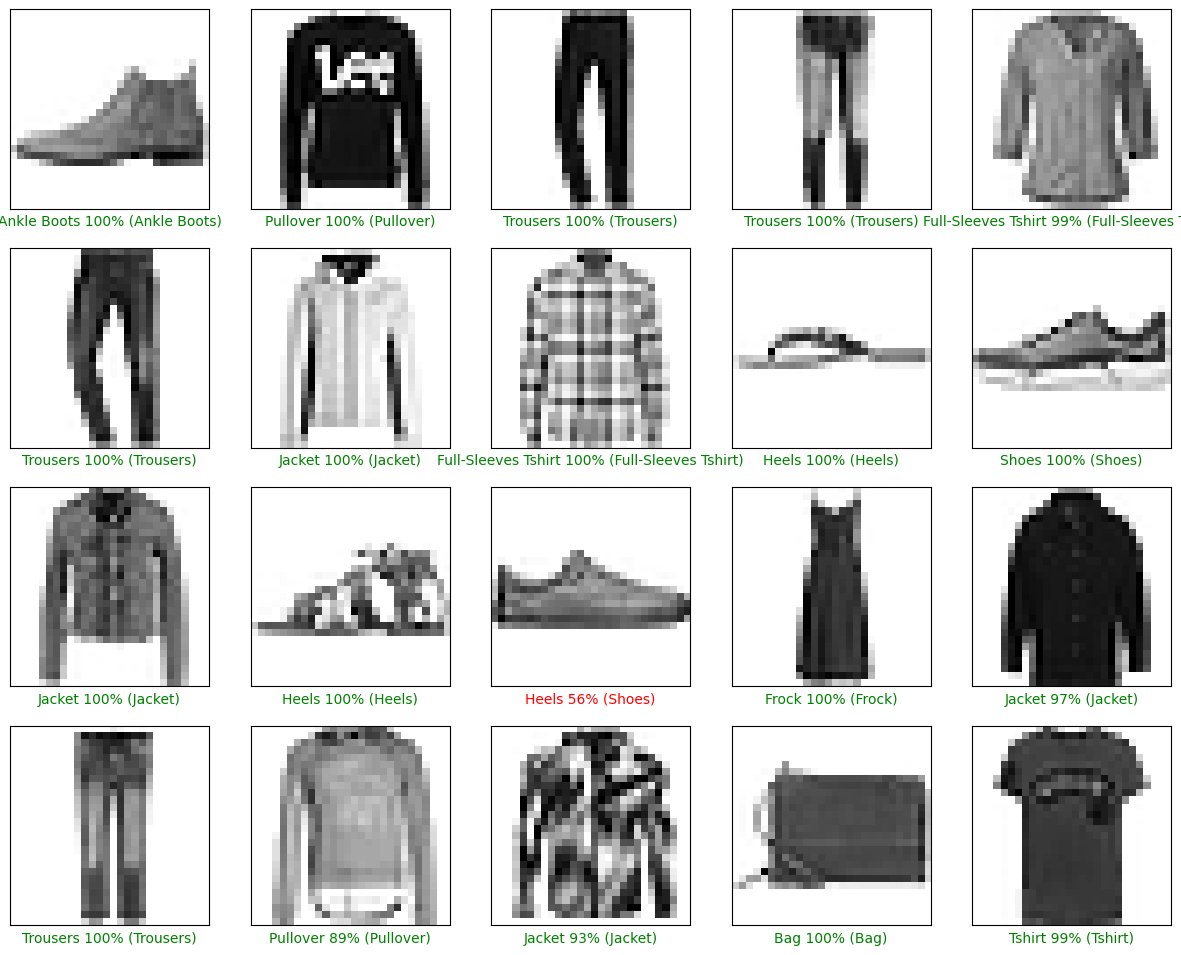

In [12]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plot_images(i,y_pred[i],test_labels[i],test_images[i])
plt.show()